In [ ]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
import pandas as pd

%matplotlib inline
np.random.seed(1)

Load Data

In [ ]:
def load_happy_dataset():
    train_dataset = h5py.File('../datasets/train_happy.h5', 'r')
    train_set_x_og = np.array(train_dataset['train_set_x'][:])
    train_set_y_og = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File('../datasets/test_happy.h5', 'r')
    test_set_x_og = np.array(test_dataset['test_set_x'][:])
    test_set_y_og = np.array(test_dataset['test_set_y'][:])

    classes = np.array(test_dataset['list_classes'][:])

    train_set_y_og = train_set_y_og.reshape((1, train_set_y_og.shape[0]))
    test_set_y_og = test_set_y_og.reshape((1, test_set_y_og.shape[0]))

    return train_set_x_og, train_set_y_og, test_set_x_og, test_set_y_og, classes

In [ ]:
X_train_OG, Y_train_OG, X_test_OG, Y_test_OG, classes = load_happy_dataset()

X_train = X_train_OG/255.
X_test = X_test_OG/255.

Y_train = Y_train_OG.T
Y_test = Y_test_OG.T

index = 42
plt.imshow(X_train_OG[index])
plt.show()

Model using sequential API

In [ ]:
def sequential_model():
    model = tf.keras.Sequential([
        tf.keras.layers.ZeroPadding2D(padding=(3, 3), input_shape=(64, 64, 3), data_format="channels_last"),
        tf.keras.layers.Conv2D(32, (7, 7), strides=(1, 1), name='conv0'),
        tf.keras.layers.BatchNormalization(axis=3, name='bn0'),
        tf.keras.layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0),
        tf.keras.layers.MaxPooling2D((2, 2), name='max_pool0'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation='sigmoid', name='fc')
    ])
    return model

sqm = sequential_model()
sqm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
sqm.fit(X_train, Y_train, epochs=50, batch_size=32)

Model using Functional API

In [ ]:
def functional_model(input_shape):
    input_img = tf.keras.Input(input_shape)
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    Z1 = tf.keras.layers.Conv2D(filters=8, kernel_size=(4, 4), strides=(1, 1), padding='same')(input_img)
    ## RELU
    A1 = tf.keras.layers.ReLU()(Z1)
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tf.keras.layers.MaxPooling2D(pool_size=(8, 8), strides=(8, 8), padding='same')(A1)
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    Z2 = tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2), strides=(1, 1), padding='same')(P1)
    ## RELU
    A2 = tf.keras.layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0)(Z2)
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.keras.layers.MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same')(A2)
    ## FLATTEN
    F = tf.keras.layers.Flatten()(P2)
    ## Dense layer
    outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(F)

    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

conv_model = functional_model((64, 64, 3))

In [ ]:
X_train.shape, Y_train.shape

Train the model

In [10]:
conv_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
# test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
19/19 [==============================] - 2s 29ms/step - loss: 0.3552 - accuracy: 0.8833 - val_loss: 0.4125 - val_accuracy: 0.8267
Epoch 2/20
19/19 [==============================] - 0s 16ms/step - loss: 0.3409 - accuracy: 0.8900 - val_loss: 0.3909 - val_accuracy: 0.8333
Epoch 3/20
19/19 [==============================] - 0s 17ms/step - loss: 0.3302 - accuracy: 0.8967 - val_loss: 0.3911 - val_accuracy: 0.8467
Epoch 4/20
19/19 [==============================] - 0s 17ms/step - loss: 0.3229 - accuracy: 0.9000 - val_loss: 0.3792 - val_accuracy: 0.8333
Epoch 5/20
19/19 [==============================] - 0s 16ms/step - loss: 0.3131 - accuracy: 0.9000 - val_loss: 0.3757 - val_accuracy: 0.8467
Epoch 6/20
19/19 [==============================] - 0s 17ms/step - loss: 0.3070 - accuracy: 0.9000 - val_loss: 0.3804 - val_accuracy: 0.8533
Epoch 7/20
19/19 [==============================] - 0s 16ms/step - loss: 0.2968 - accuracy: 0.9050 - val_loss: 0.3697 - val_accuracy: 0.8467
Epoch 8/20
19

Plot loss graph

/tmp/ipykernel_13162/974158325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
/tmp/ipykernel_13162/974158325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

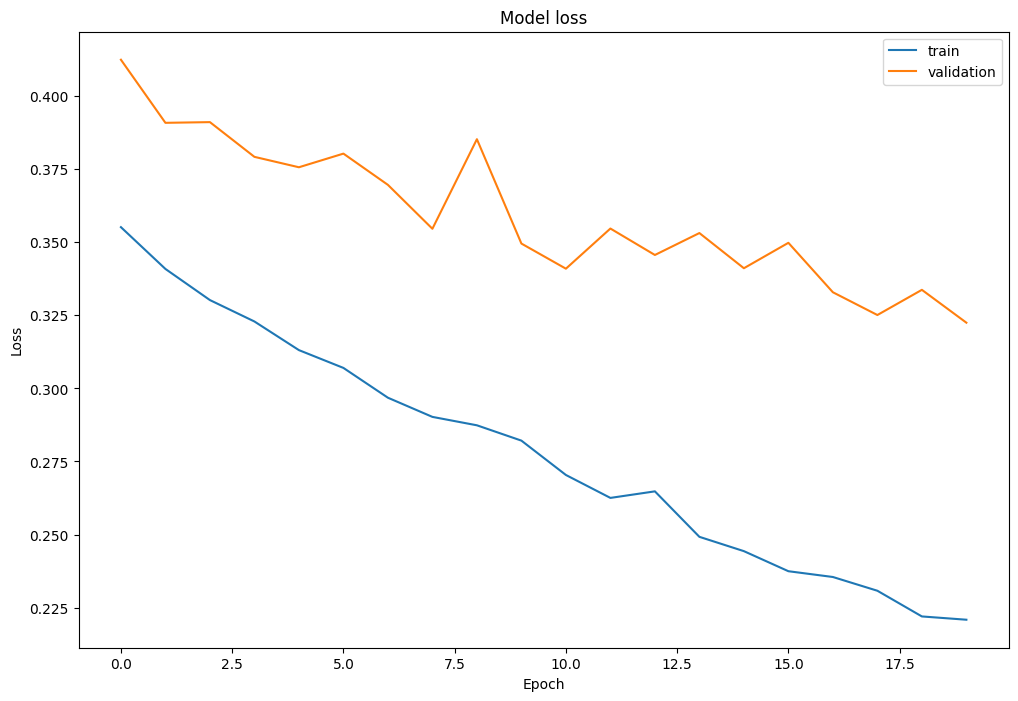

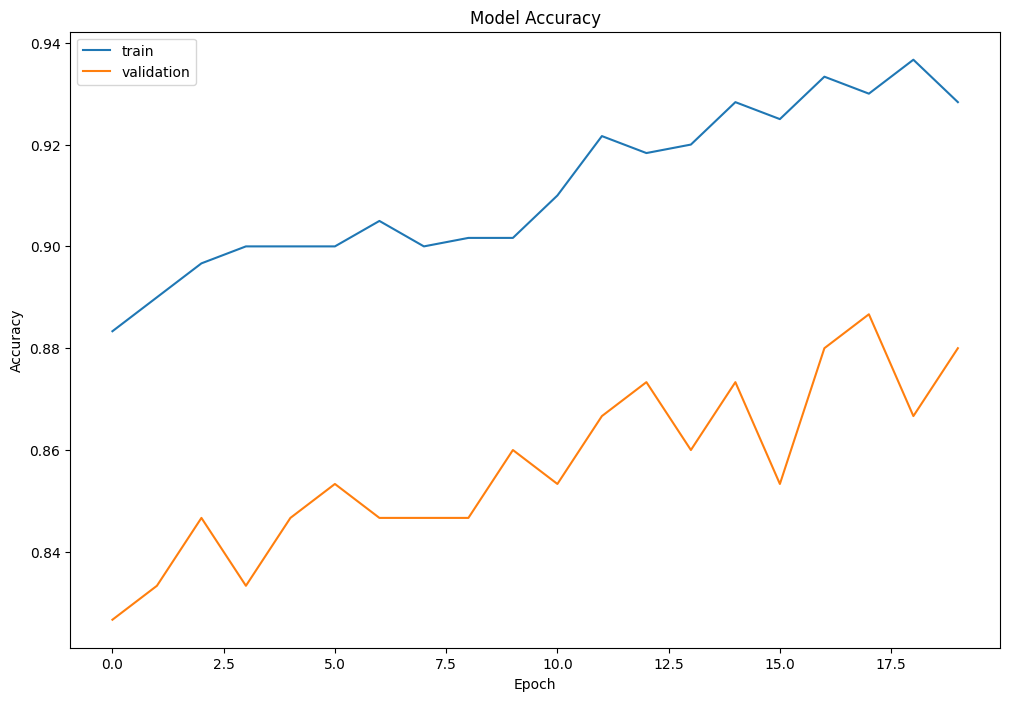

In [11]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')